In [ ]:
#install ktrain
!pip install ktrain

In [ ]:
#to get the explain function work you should run this code
#import os
#os.environ['DISABLE_V2_BEHAVIOR'] = '1'

In [ ]:
#imports
import ktrain
import re
from ktrain import vision as vis
from google.colab import drive

In [ ]:
#mount the google drive to access files
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#regex to extract the age label from file name
regex =  r'/(\d+)_\d+_\d+_\d+\.jpg\.chip\.jpg$'

p = re.compile(regex)
r = p.search('/content/drive/MyDrive/UTKFace/1_0_0_20161219140627985.jpg.chip.jpg')

if r is not None:
    age = int(r.group(1))
    print("Extracted Age: %d" % age)
else:
    print("No match found.")


Extracted Age: 1


In [ ]:
#store the dataset path to a var
UTKFace = '/content/drive/MyDrive/UTKFace'

#extract labels
data_aug = vis.get_data_aug(horizontal_flip=True)
(train_data, val_data, preproc) = vis.images_from_fname(UTKFace, pattern=regex, data_aug=data_aug,
                                                      is_regression=True, random_state=42)

/usr/local/lib/python3.10/dist-packages/ktrain/vision/data.py:814: UserWarning: Could not extract target for /content/drive/MyDrive/UTKFace/61_1_20170109150557335.jpg.chip.jpg -  skipping this file
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/ktrain/vision/data.py:814: UserWarning: Could not extract target for /content/drive/MyDrive/UTKFace/61_1_20170109142408075.jpg.chip.jpg -  skipping this file
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/ktrain/vision/data.py:814: UserWarning: Could not extract target for /content/drive/MyDrive/UTKFace/55_0_0_20170116232725357jpg.chip.jpg -  skipping this file
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/ktrain/vision/data.py:814: UserWarning: Could not extract target for /content/drive/MyDrive/UTKFace/39_1_20170116174525125.jpg.chip.jpg -  skipping this file
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/ktrain/vision/data.py:814: UserWarning: Could not extract target for /content/drive/MyDrive/UTKFace

['label']
       label
776     96.0
3686    60.0
4305    54.0
3222    58.0
19751   24.0
['label']
       label
7948    45.0
21620    1.0
10407   35.0
649      8.0
8317    39.0
Found 23708 images belonging to 1 classes.
Found 21332 validated image filenames.
Found 2371 validated image filenames.


In [ ]:
#available pretrained models for regression issue
vis.print_image_regression_models()

pretrained_resnet50: 50-layer Residual Network (pretrained on ImageNet)
resnet50: 50-layer Resididual Network (randomly initialized) [https://arxiv.org/abs/1512.03385]
pretrained_mobilenet: MobileNet Neural Network (pretrained on ImageNet)
mobilenet: MobileNet Neural Network (randomly initialized) [https://arxiv.org/abs/1704.04861]
pretrained_mobilenetv3: MobileNetV3-Small Neural Network (pretrained on ImageNet)
mobilenetv3: MobileNetV3-Small Neural Network (randomly initialized) [https://arxiv.org/abs/1905.02244]
pretrained_inception: Inception Version 3  (pretrained on ImageNet)
inception: Inception Version 3 (randomly initialized) [http://arxiv.org/abs/1512.00567]
pretrained_efficientnetb1: EfficientNet-B1 Neural Network (pretrained on ImageNet)
efficientnetb1: EfficientNet-B1 Neural Network (pretrained on ImageNet) [https://arxiv.org/abs/1905.11946]
pretrained_efficientnetb7: EfficientNet-B7 Neural Network (pretrained on ImageNet)
efficientnetb7: EfficientNet-B7 Neural Network (pre

In [ ]:
#creating resnet50 pretrained model
model = vis.image_regression_model('pretrained_resnet50', train_data, val_data)

The normalization scheme has been changed for use with a pretrained_resnet50 model. If you decide to use a different model, please reload your dataset with a ktrain.vision.data.images_from* function.

Is Multi-Label? False
Is Regression? True
94765736/94765736 [==============================] - 3s 0us/step
pretrained_resnet50 model created.


In [ ]:
# wrap model and data in Learner object
learner = ktrain.get_learner(model=model, train_data=train_data, val_data=val_data,
                             workers=8, use_multiprocessing=False, batch_size=64)

In [ ]:
#to find learning rate
learner.lr_find(max_epochs=5)

simulating training for different learning rates... this may take a few moments...
Epoch 1/5
333/333 [==============================] - 803s 2s/step - loss: 1208.9183 - mae: 28.9904
Epoch 2/5
333/333 [==============================] - 312s 916ms/step - loss: 418.1373 - mae: 15.4604
Epoch 3/5
333/333 [==============================] - 310s 917ms/step - loss: 191.0788 - mae: 10.6236
Epoch 4/5
333/333 [==============================] - 73s 201ms/step - loss: 1641.0870 - mae: 29.4522


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


Three possible suggestions for LR from plot:
	Longest valley (red): 2.61E-05
	Min numerical gradient (purple): 2.83E-06
	Min loss divided by 10 (omitted from plot): 4.58E-04


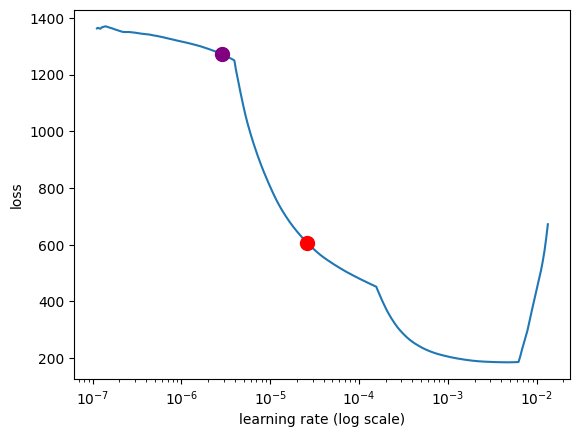

In [ ]:
learner.lr_plot(suggest=True)
#where the loss is falling prior to divergence

In [ ]:
#learner.lr_plot()

In [ ]:
learner.fit_onecycle(1e-4, 5)



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/5
334/334 [==============================] - 1506s 4s/step - loss: 418.7355 - mae: 15.4484 - val_loss: 218.1319 - val_mae: 10.9656
Epoch 2/5
334/334 [==============================] - 344s 1s/step - loss: 196.2382 - mae: 10.6818 - val_loss: 156.0298 - val_mae: 9.9116
Epoch 3/5
334/334 [==============================] - 347s 1s/step - loss: 164.6121 - mae: 9.8420 - val_loss: 129.1640 - val_mae: 8.8342
Epoch 4/5
334/334 [==============================] - 347s 1s/step - loss: 152.8455 - mae: 9.4453 - val_loss: 121.2349 - val_mae: 8.5831
Epoch 5/5
334/334 [==============================] - 346s 1s/step - loss: 147.5431 - mae: 9.3152 - val_loss: 119.9222 - val_mae: 8.5461


In [ ]:
learner.freeze(15) # unfreeze all but the first 15 layers

In [ ]:
learner.fit_onecycle(1e-4, 2)



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/2
334/334 [==============================] - 376s 1s/step - loss: 130.5847 - mae: 8.5886 - val_loss: 124.8540 - val_mae: 8.3338
Epoch 2/2
334/334 [==============================] - 393s 1s/step - loss: 84.7745 - mae: 6.8521 - val_loss: 61.1660 - val_mae: 5.7204


In [ ]:
learner.fit_onecycle(1e-4, 3)



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/3
334/334 [==============================] - ETA: 0s - loss: 69.5548 - mae: 6.1872

In [ ]:
learner.fit_onecycle(1e-4, 5)



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/5
334/334 [==============================] - 350s 1s/step - loss: 52.8096 - mae: 5.3730 - val_loss: 59.5814 - val_mae: 5.8296
Epoch 2/5
334/334 [==============================] - 374s 1s/step - loss: 56.0279 - mae: 5.5548 - val_loss: 57.6246 - val_mae: 5.4255
Epoch 3/5
334/334 [==============================] - 356s 1s/step - loss: 61.2233 - mae: 5.7641 - val_loss: 61.8292 - val_mae: 5.7084
Epoch 4/5
334/334 [==============================] - 358s 1s/step - loss: 51.9609 - mae: 5.3234 - val_loss: 52.9403 - val_mae: 5.2339
Epoch 5/5
334/334 [==============================] - 355s 1s/step - loss: 43.0377 - mae: 4.8627 - val_loss: 49.1941 - val_mae: 5.0836


In [ ]:
learner.fit_onecycle(1e-4, 2)



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/2
334/334 [==============================] - 380s 1s/step - loss: 44.8852 - mae: 4.9546 - val_loss: 66.8255 - val_mae: 5.8661
Epoch 2/2
334/334 [==============================] - 367s 1s/step - loss: 47.5075 - mae: 5.0808 - val_loss: 49.6250 - val_mae: 5.0083


In [ ]:
#learner.fit_onecycle(1e-4, 3)

In [ ]:
#learner.fit_onecycle(1e-4, 2)

In [ ]:
# get a Predictor instance that wraps model and Preprocessor object
predictor = ktrain.get_predictor(learner.model, preproc)

In [ ]:
#function to show the orediction
def show_prediction(fname):
    fname = UTKFace+'/'+fname
    predicted = round(predictor.predict_filename(fname)[0])
    actual = int(p.search(fname).group(1))
    vis.show_image(fname)
    print('predicted:%s | actual: %s' % (predicted, actual))

predicted:25 | actual: 24


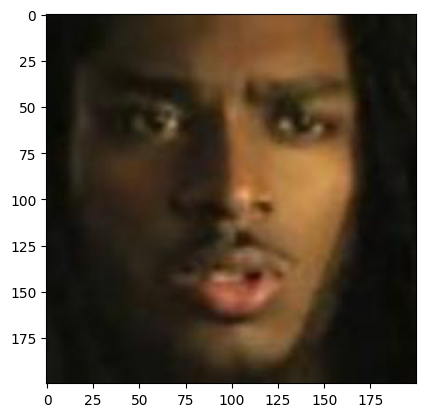

In [ ]:
show_prediction('24_0_1_20170113134107281.jpg.chip.jpg')

predicted:50 | actual: 65


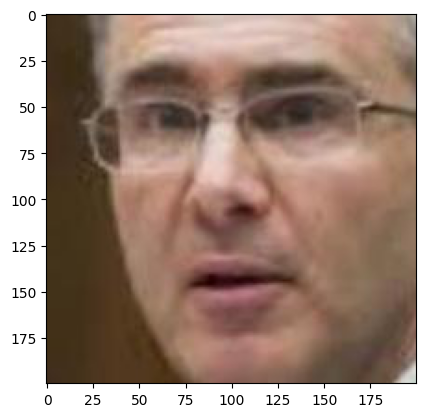

In [ ]:
show_prediction('65_0_0_20170117160554095.jpg.chip.jpg')

predicted:5 | actual: 3


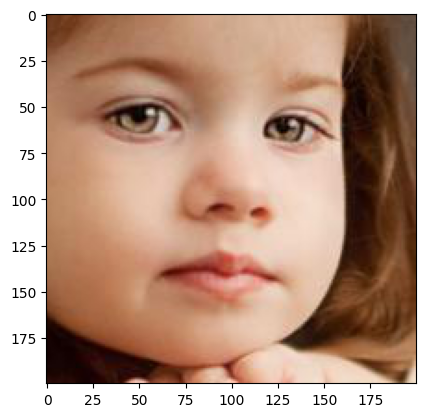

In [ ]:
show_prediction('3_1_0_20170109191511657.jpg.chip.jpg')

predicted:69 | actual: 75


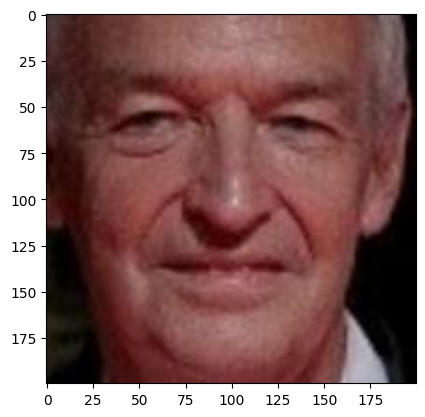

In [ ]:
show_prediction('75_0_0_20170111204348525.jpg.chip.jpg')

In [ ]:
#to save the model
predictor.save('/content/drive/MyDrive/age_predictor_new')

In [ ]:
#reload the model
reloaded_predictor = ktrain.load_predictor('/content/drive/MyDrive/age_predictor_new')